# Análise de fraude em cartão de crédito

### Neste projeto vamos analisar, explorar e reconhecer o padrão dos dados da base Credit-Card-Fraud.

Aqui as classes estão dividas em 0 e 1 em que:

 0 | 1 
:-: | :-:
Legítimo | Fraude

In [1]:
# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para importação dos dados
import pandas as pd

# Setando o estilo padrão da visualização
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
# Lendo os dados e realizando a primeira observação
dataframe = pd.read_csv('input/creditcard.csv')
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Verificando qual o tipo do dado e se há colunas em branco
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
dataframe.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Análise Exploratória de Dados (EDA)

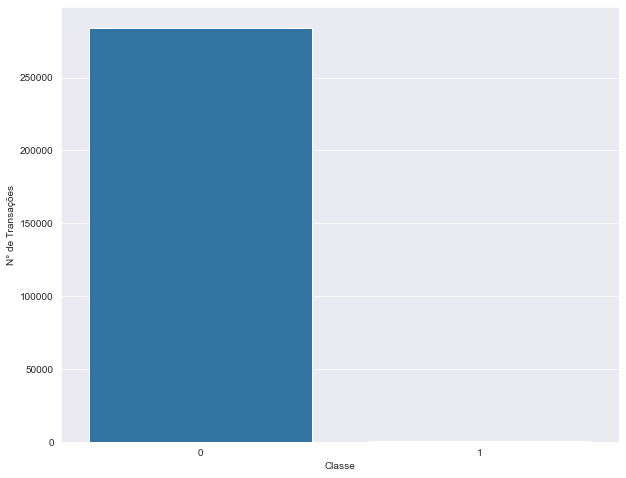

In [5]:
# Analisando a distribuição de classes
plt.figure(figsize=(10,8))
sns.countplot('Class', data=dataframe)
plt.xlabel("Classe")
plt.ylabel("N° de Transações")

plt.show()

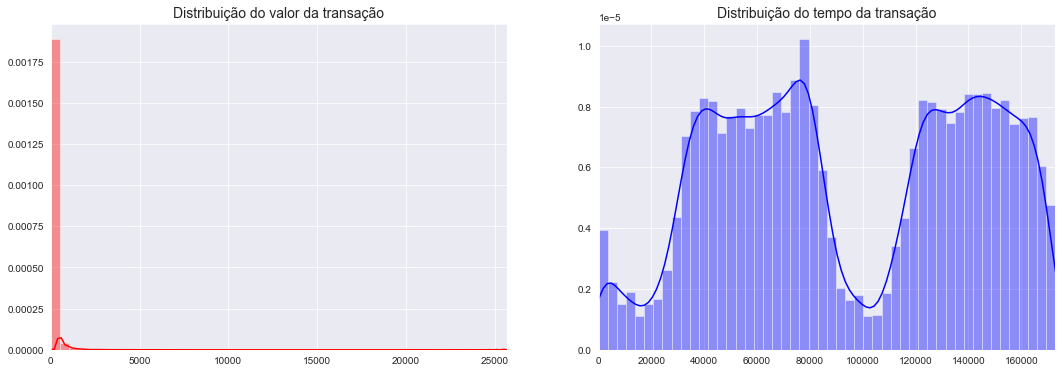

In [6]:
# Analisando a distribuição do tempo & valor das transações

fig, ax = plt.subplots(1, 2, figsize=(18,6))

amount_val = dataframe['Amount'].values
time_val = dataframe['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribuição do valor da transação', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribuição do tempo da transação', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

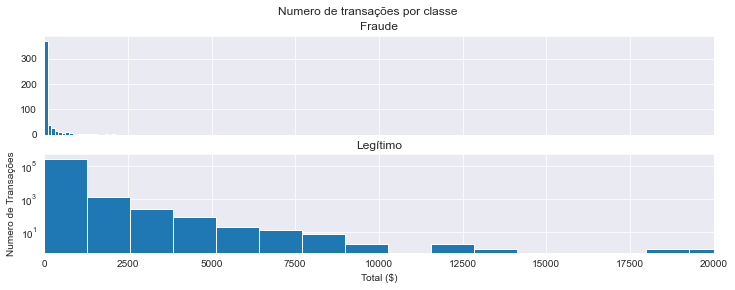

In [7]:
# Analisando a distribuição entre o número de transações e seus valores por classe

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
fig.suptitle('Numero de transações por classe')

bins = 20

ax1.hist(dataframe[dataframe['Class']==1]['Amount'], bins = bins)
ax1.set_title('Fraude')

ax2.hist(dataframe[dataframe['Class']==0]['Amount'], bins = bins)
ax2.set_title('Legítimo')

plt.xlabel('Total ($)')
plt.ylabel('Numero de Transações')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

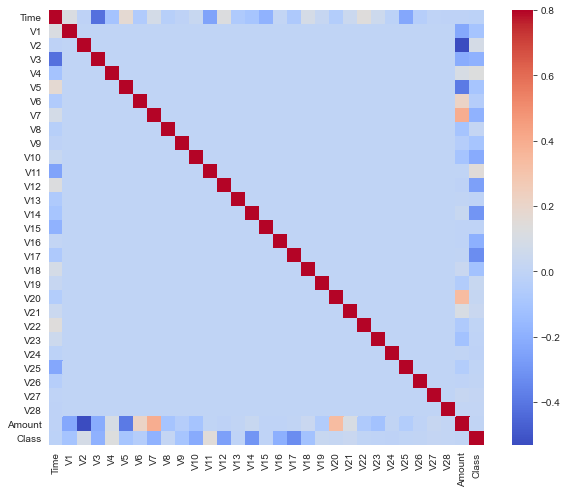

In [8]:
# Gerando uma matrix de correlação

correlation_matrix = dataframe.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, vmax=0.8, square = True, cmap = "coolwarm")
plt.show()

## Analisando dados com aprendizado de máquina

### Pré-processamento

In [9]:
# Bibliotecas para pré-processamento
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Biblioteca para a avaliação do modelo
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Biblioteca para manipulação algebrica
import numpy as np

In [10]:
# Balanceando os pesos de cada classe

class_weights = list(compute_class_weight('balanced',
                                     np.unique(dataframe['Class'].values),
                                     dataframe['Class'].values))

weights = {0: class_weights[0],
           1: class_weights[1]}

del class_weights

C:\tools\miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 0 0 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [11]:
# Definindo o X (Características) e y (Rótulo)

X = dataframe.iloc[:, 0:30]
y = dataframe['Class'].values

In [12]:
# Realizando o escalonamento das características

scaler = StandardScaler()
X = scaler.fit_transform(X=X)

In [13]:
# Separando o dataset em 75% para treino e 25% para teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

del X, y

### Treinamento

In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from time import time

In [15]:
def TrainAndEvaluate(classifier, X_train, y_train, X_test, y_test):
    tac = time()
    classifier.fit(X_train, y_train)
    preds = classifier.predict(X_test)
    print(classification_report(y_test, preds))
    print(f"Acurácia: {accuracy_score(y_test, preds)*100:.2f}%")
    plot_confusion_matrix(confusion_matrix(y_test, preds))
    tic = time()
    execution_time = tic - tac
    print(f"Tempo de execução - {execution_time:.3f} segundos")

In [16]:
def TrainAndEvaluateEnsembleMethod(estimators_list, X_train, y_train, X_test, y_test):
    tac = time()
    ensemble = VotingClassifier(estimators_list)
    ensemble.fit(X_train, y_train)
    preds = ensemble.predict(X_test)
    print(classification_report(y_test, preds))
    print(f"Acurácia: {accuracy_score(y_test, preds)*100:.2f}%")
    plot_confusion_matrix(confusion_matrix(y_test, preds))
    tic = time()
    execution_time = tic - tac
    print(f"Tempo de execução - {execution_time:.3f} segundos")

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.07      0.89      0.13       123

    accuracy                           0.98     71202
   macro avg       0.53      0.94      0.56     71202
weighted avg       1.00      0.98      0.99     71202

Acurácia: 97.93%
Tempo de execução - 1.411 segundos


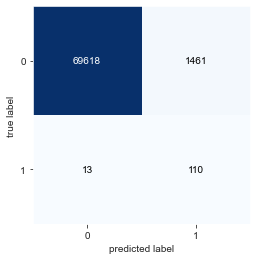

In [17]:
TrainAndEvaluate(LogisticRegression(class_weight=weights), 
                 X_train, 
                 y_train, 
                 X_test, 
                 y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.75      0.83       123

    accuracy                           1.00     71202
   macro avg       0.97      0.87      0.92     71202
weighted avg       1.00      1.00      1.00     71202

Acurácia: 99.95%
Tempo de execução - 550.864 segundos


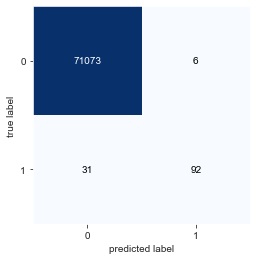

In [18]:
TrainAndEvaluate(KNeighborsClassifier(), 
                 X_train, 
                 y_train, 
                 X_test, 
                 y_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.78      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.88      0.55     71202
weighted avg       1.00      0.98      0.99     71202

Acurácia: 97.84%
Tempo de execução - 0.277 segundos


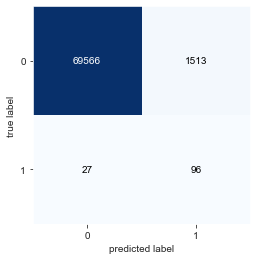

In [19]:
TrainAndEvaluate(GaussianNB(), 
                 X_train, 
                 y_train, 
                 X_test, 
                 y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.76      0.76      0.76       123

    accuracy                           1.00     71202
   macro avg       0.88      0.88      0.88     71202
weighted avg       1.00      1.00      1.00     71202

Acurácia: 99.92%
Tempo de execução - 6.790 segundos


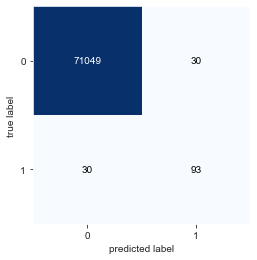

In [20]:
TrainAndEvaluate(DecisionTreeClassifier(criterion='entropy', 
                                        class_weight=weights), 
                 X_train, 
                 y_train, 
                 X_test, 
                 y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.34      0.68      0.45       123

    accuracy                           1.00     71202
   macro avg       0.67      0.84      0.72     71202
weighted avg       1.00      1.00      1.00     71202

Acurácia: 99.71%
Tempo de execução - 97.730 segundos


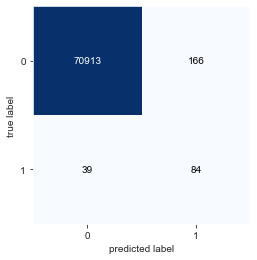

In [21]:
TrainAndEvaluate(SVC(class_weight=weights), 
                 X_train, 
                 y_train, 
                 X_test, 
                 y_test)

In [22]:
estimators_list = [
                    ('lr', LogisticRegression(class_weight=weights)), 
                    ('knn', KNeighborsClassifier()), 
                    ('nb', GaussianNB()), 
                    ('tree', DecisionTreeClassifier(criterion='entropy', 
                                                    class_weight=weights)),
                    ('svm', SVC(class_weight=weights))
                  ]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.90      0.78      0.83       123

    accuracy                           1.00     71202
   macro avg       0.95      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202

Acurácia: 99.95%
Tempo de execução - 666.577 segundos


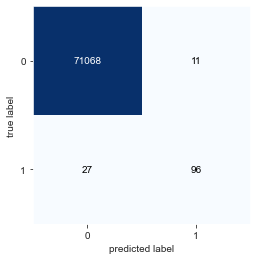

In [23]:
TrainAndEvaluateEnsembleMethod(estimators_list, 
                               X_train, 
                               y_train, 
                               X_test, 
                               y_test)